In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
print(data_train.shape)
data_test


(891, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


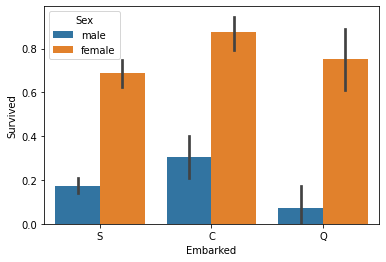

In [175]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)
plt.show()

In [176]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    # print(df)
    return df

data_train = transform_features(data_train)
print(data_train)
data_test = transform_features(data_test)

     PassengerId  Survived  Pclass     Sex          Age  SibSp  Parch  \
0              1         0       3    male      Student      1      0   
1              2         1       1  female        Adult      1      0   
2              3         1       3  female  Young Adult      0      0   
3              4         1       1  female  Young Adult      1      0   
4              5         0       3    male  Young Adult      0      0   
..           ...       ...     ...     ...          ...    ...    ...   
886          887         0       2    male  Young Adult      0      0   
887          888         1       1  female      Student      0      0   
888          889         0       3  female      Unknown      1      2   
889          890         1       1    male  Young Adult      0      0   
890          891         0       3    male  Young Adult      0      0   

           Fare Cabin       Lname NamePrefix  
0    1_quartile     N     Braund,        Mr.  
1    4_quartile     C    Cumi

In [177]:

from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
print(data_train)

     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  \
0              1         0       3    1    4      1      0     0      7   
1              2         1       1    0    0      1      0     3      2   
2              3         1       3    0    7      0      0     0      7   
3              4         1       1    0    7      1      0     3      2   
4              5         0       3    1    7      0      0     1      7   
..           ...       ...     ...  ...  ...    ...    ...   ...    ...   
886          887         0       2    1    7      0      0     1      7   
887          888         1       1    0    4      0      0     2      1   
888          889         0       3    0    6      1      2     2      7   
889          890         1       1    1    7      0      0     2      2   
890          891         0       3    1    7      0      0     0      7   

     Lname  NamePrefix  
0      100          19  
1      182          20  
2      329          16  

In [178]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)
print(X_train)
print(y_train)

     Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Lname  NamePrefix
151       1    0    4      1      0     3      2    622          20
753       3    1    4      0      0     0      7    385          19
746       3    1    5      1      1     2      7      1          19
684       2    1    0      1      1     3      7    104          19
887       1    0    4      0      0     2      1    294          16
..      ...  ...  ...    ...    ...   ...    ...    ...         ...
31        1    0    6      1      0     3      1    755          20
488       3    1    7      0      0     1      7    752          19
40        3    0    0      1      0     1      7      8          20
742       1    0    4      2      2     3      1    693          16
595       3    1    0      1      1     2      7    811           9

[712 rows x 9 columns]
151    1
753    0
746    0
684    0
887    1
      ..
31     1
488    0
40     0
742    1
595    0
Name: Survived, Length: 712, dtype: int64


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=9)

In [181]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8491620111731844


In [182]:
 from sklearn.model_selection import KFold
 def run_kfold(clf):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(data_train):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
run_kfold(clf)

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8876404494382022
Fold 3 accuracy: 0.797752808988764
Fold 4 accuracy: 0.8539325842696629
Fold 5 accuracy: 0.8539325842696629
Fold 6 accuracy: 0.8764044943820225
Fold 7 accuracy: 0.8089887640449438
Fold 8 accuracy: 0.8426966292134831
Fold 9 accuracy: 0.8202247191011236
Fold 10 accuracy: 0.8089887640449438
Mean Accuracy: 0.8328339575530587


In [183]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
